### Performing generated paraphrased texts similarity analysis with the original texts
using: https://radimrehurek.com/gensim/auto_examples/core/run_similarity_queries.html#sphx-glr-auto-examples-core-run-similarity-queries-py

In [42]:
import os
from collections import defaultdict
from gensim import corpora
from gensim import models
from gensim import similarities
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\grzeg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
def remove_stopwords(document):
    return [word for word in document.lower().split() if word not in stop_words]

def calculate_similarities(raw_texts, original_text):
    
    texts = [remove_stopwords(document) for document in raw_texts]
    
    frequency = defaultdict(int)
    for text in texts:
        for token in text:
            frequency[token] += 1
    
    texts = [
        [token for token in text if frequency[token] > 1]
        for text in texts
    ]
    
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2)
    
    index = similarities.MatrixSimilarity(lsi[corpus])
    
    vec_bow = dictionary.doc2bow(remove_stopwords(original_text))
    vec_lsi = lsi[vec_bow]
    
    # Performing queries
    sims = index[vec_lsi]
    
    return sims

In [63]:
summarized_mda_sections_for_not_eligible_companies_for_oversampling_paraphrased_raw_directory = 'summarized_mda_sections_for_not_eligible_companies_for_oversampling_paraphrased_raw'
summarized_mda_sections_for_not_eligible_companies_for_oversampling_directory = 'summarized_mda_sections_for_not_eligible_companies_for_oversampling'
summarized_mda_sections_for_not_eligible_companies_for_oversampling_second_summarization_directory = 'summarized_mda_sections_for_not_eligible_companies_for_oversampling_second_summarization'

In [35]:
original_summarized_filenames_dict = {}
for filename in os.listdir(summarized_mda_sections_for_not_eligible_companies_for_oversampling_directory):
    original_summarized_filenames_dict[filename.split('-')[0]] = filename
len(original_summarized_filenames_dict)

232

In [44]:
paraphrased_texts = []
all_similarities = []

stop_words = stopwords.words('english')

previous_cik = -1

sorted_filenames = sorted(os.listdir(summarized_mda_sections_for_not_eligible_companies_for_oversampling_paraphrased_raw_directory))
original_summarized_filenames_dict_keys = original_summarized_filenames_dict.keys()

for filename in sorted_filenames:
    cik = filename.split('-')[0]
    
    if previous_cik != cik and previous_cik != -1:
        
        if cik in original_summarized_filenames_dict_keys:
            
            original_filename = original_summarized_filenames_dict[cik]
            with open(os.path.join(summarized_mda_sections_for_not_eligible_companies_for_oversampling_directory, original_filename), 'r') as file:
                original_text = file.read()
        
            sims = calculate_similarities(paraphrased_texts, original_text)
            all_similarities.append(sims)
            
        paraphrased_texts = []
        
    with open(os.path.join(summarized_mda_sections_for_not_eligible_companies_for_oversampling_paraphrased_raw_directory, filename), 'r') as file:
        text = file.read()
        
    paraphrased_texts.append(text)
        
    previous_cik = cik

In [46]:
all_similarities_flattened = [sim for sims in all_similarities for sim in sims]
len(all_similarities_flattened)

2130

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,
          1.,   1.,   0.,   0.,   1.,   2.,   0.,   4.,   1.,   0.,   1.,
          0.,   4.,   0.,   2.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   4.,   1.,
          7.,   1.,   1.,   1.,   0.,   2.,   4.,   2.,   0.,   0.,   2.,
          2.,   1.,   2.,   1.,   1.,   2.,   1.,   1.,   1.,   3.,   1.,
          0.,   1.,   4.,   4.,  10.,   5.,   6.,   4.,   7.,   4.,   1.,
          5.,   5.,   2.,   8.,  10., 

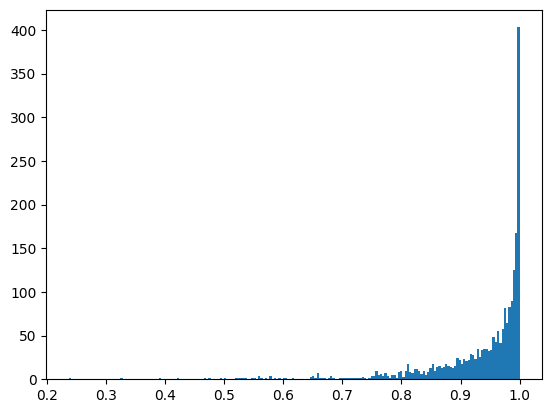

In [48]:
import matplotlib.pyplot as plt
plt.hist(all_similarities_flattened, bins=200)

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   2.,   2.,   1.,   2.,   3.,   3.,   6.,
          6.,   2.,   3.,   0.,   3.,  13.,   4.,   6.,   7.,   5.,   6.,
          9.,  25.,  17.,  25.,  37.,  40.,  29.,  54.,  59.,  57.,  86.,
        100., 118., 135., 188., 287., 786.]),
 array([0.236258  , 0.25153285, 0.26680768, 0.28208253, 0.29735735,
        0.3126322 , 0.32790703, 0.34318188, 0.35845673, 0.37373155,
        0.38900641, 0.40428123, 0.41955608, 0.43483093, 0.45010576,
        0.46538061, 0.48065543, 0.49593028, 0.51120514, 0.52647996,
        0.54175478, 0.55702966, 0.57230449, 0.58757931, 0.60285413,
        0.61812901, 0.63340384, 0.64867866, 0.66395354, 0.67922837,
        0.69450319, 0.70977801, 0.72505289, 0.74032772, 0.75560254,
        0.77087742, 0.78615224, 0.80142707, 0.81670195, 0.83197677,
        0.84725159, 0.86252642, 0.8778013 , 0.89307612, 0.90835094,
        0.92362583, 0.93890065, 0.95417547, 0.

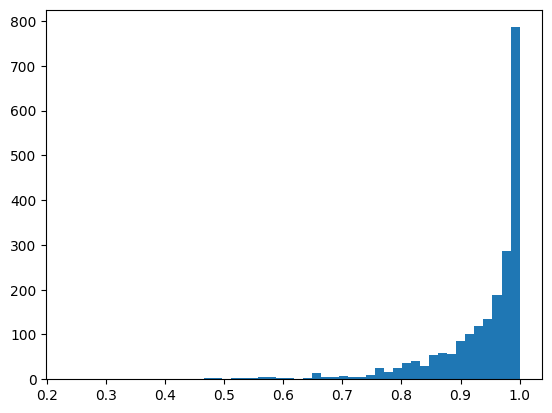

In [49]:
plt.hist(all_similarities_flattened, bins=50)

(array([1.000e+00, 1.000e+00, 2.000e+00, 1.000e+01, 2.000e+01, 2.600e+01,
        5.200e+01, 1.480e+02, 3.560e+02, 1.514e+03]),
 array([0.236258  , 0.3126322 , 0.38900641, 0.46538061, 0.54175478,
        0.61812901, 0.69450319, 0.77087742, 0.84725159, 0.92362583,
        1.        ]),
 <BarContainer object of 10 artists>)

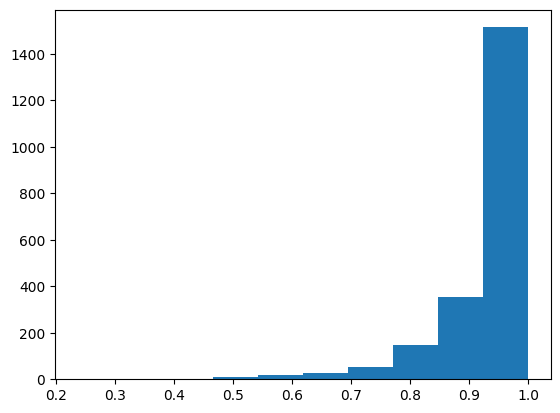

In [51]:
plt.hist(all_similarities_flattened, bins=10)

In [57]:
len([sim for sim in all_similarities_flattened if sim >= 0.9])

1659

In [58]:
len([sim for sim in all_similarities_flattened if sim < 0.9])

471

In [17]:
orig_ciks = []
for filename in os.listdir(summarized_mda_sections_for_not_eligible_companies_for_oversampling_directory):
    cik = filename.split('-')[0]
    orig_ciks.append(cik)
    
print(len(orig_ciks))

232


In [59]:
import pandas as pd
ecl_dataset = pd.read_csv('ECL.csv')
ecl_dataset.head()

C:\Users\grzeg\AppData\Local\Temp\ipykernel_15236\1277137587.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  ecl_dataset = pd.read_csv('ECL.csv')


,Unnamed: 0,cik,company,period_of_report,gvkey,datadate,filename,can_label,qualified,label,bankruptcy_prediction_split,bankruptcy_date_1,bankruptcy_date_2,bankruptcy_date_3,filing_date
0,1,1750.0,AAR CORP,1994-05-31,1004.0,31/05/1994,/1994/1750_10K_1994_0000912057-94-002818.json,True,Yes,False,train,NaN,NaN,NaN,1994-08-24
1,2,1750.0,AAR CORP,1995-05-31,1004.0,31/05/1995,/1995/1750_10K_1995_0000912057-95-006316.json,True,Yes,False,train,NaN,NaN,NaN,1995-08-11
2,3,1750.0,AAR CORP,1996-05-31,1004.0,31/05/1996,/1996/1750_10K_1996_0000912057-96-018355.json,True,Yes,False,train,NaN,NaN,NaN,1996-08-20
3,4,1750.0,AAR CORP,1997-05-31,1004.0,31/05/1997,/1997/1750_10K_1997_0000912057-97-028915.json,True,Yes,False,train,NaN,NaN,NaN,1997-08-22
4,5,1750.0,AAR CORP,1998-05-31,1004.0,31/05/1998,/1998/1750_10K_1998_0001047469-98-032283.json,True,Yes,False,train,NaN,NaN,NaN,1998-08-20


In [60]:
ecl_dataset['cik'] = ecl_dataset['cik'].astype(int)

ecl_dataset.head()

,Unnamed: 0,cik,company,period_of_report,gvkey,datadate,filename,can_label,qualified,label,bankruptcy_prediction_split,bankruptcy_date_1,bankruptcy_date_2,bankruptcy_date_3,filing_date
0,1,1750,AAR CORP,1994-05-31,1004.0,31/05/1994,/1994/1750_10K_1994_0000912057-94-002818.json,True,Yes,False,train,NaN,NaN,NaN,1994-08-24
1,2,1750,AAR CORP,1995-05-31,1004.0,31/05/1995,/1995/1750_10K_1995_0000912057-95-006316.json,True,Yes,False,train,NaN,NaN,NaN,1995-08-11
2,3,1750,AAR CORP,1996-05-31,1004.0,31/05/1996,/1996/1750_10K_1996_0000912057-96-018355.json,True,Yes,False,train,NaN,NaN,NaN,1996-08-20
3,4,1750,AAR CORP,1997-05-31,1004.0,31/05/1997,/1997/1750_10K_1997_0000912057-97-028915.json,True,Yes,False,train,NaN,NaN,NaN,1997-08-22
4,5,1750,AAR CORP,1998-05-31,1004.0,31/05/1998,/1998/1750_10K_1998_0001047469-98-032283.json,True,Yes,False,train,NaN,NaN,NaN,1998-08-20


In [61]:
ecl_dataset['cik'] = ecl_dataset['cik'].astype(str)
ecl_dataset.head()

,Unnamed: 0,cik,company,period_of_report,gvkey,datadate,filename,can_label,qualified,label,bankruptcy_prediction_split,bankruptcy_date_1,bankruptcy_date_2,bankruptcy_date_3,filing_date
0,1,1750,AAR CORP,1994-05-31,1004.0,31/05/1994,/1994/1750_10K_1994_0000912057-94-002818.json,True,Yes,False,train,NaN,NaN,NaN,1994-08-24
1,2,1750,AAR CORP,1995-05-31,1004.0,31/05/1995,/1995/1750_10K_1995_0000912057-95-006316.json,True,Yes,False,train,NaN,NaN,NaN,1995-08-11
2,3,1750,AAR CORP,1996-05-31,1004.0,31/05/1996,/1996/1750_10K_1996_0000912057-96-018355.json,True,Yes,False,train,NaN,NaN,NaN,1996-08-20
3,4,1750,AAR CORP,1997-05-31,1004.0,31/05/1997,/1997/1750_10K_1997_0000912057-97-028915.json,True,Yes,False,train,NaN,NaN,NaN,1997-08-22
4,5,1750,AAR CORP,1998-05-31,1004.0,31/05/1998,/1998/1750_10K_1998_0001047469-98-032283.json,True,Yes,False,train,NaN,NaN,NaN,1998-08-20


In [62]:
ciks = ecl_dataset['cik'].values
max([len(cik) for cik in ciks])

7

In [67]:
from collections import Counter
ciks_sec = [filename.split('-')[0] for filename in os.listdir(summarized_mda_sections_for_not_eligible_companies_for_oversampling_second_summarization_directory)]

ciks_sec_counter = Counter(ciks_sec)

for cik, count in ciks_sec_counter.items():
    if count > 1:
        print(cik, count)

In [70]:
import re

def clean_markdown(text):
    markdown_chars = ["*", "_", "#", "~", "`", ">", "=", "[", "]"]
    text = re.sub(f"[{re.escape(''.join(markdown_chars))}]", "", text)
    text = re.sub(r"\n", " ", text)
    
    return text

In [75]:
textual_data = pd.DataFrame(columns=['cik', 'text'])

for filename in os.listdir(summarized_mda_sections_for_not_eligible_companies_for_oversampling_paraphrased_raw_directory):
    
    cik = filename.split('-')[0]
    
    if 'paraphrased-raw' in filename:
        filename_id = int(filename.split('-')[3].split('.')[0])
        if filename_id == 10:
            zero_padded_id = f'10'
        elif 0 <= filename_id <= 9:
            zero_padded_id = f'0{filename_id}'
        else:
            print('error: id not in range')
            zero_padded_id = f'99'
            
        cik = f'{cik}{zero_padded_id}'
        
    cik = int(cik)
    
    with open(os.path.join(summarized_mda_sections_for_not_eligible_companies_for_oversampling_paraphrased_raw_directory, filename), 'r') as file:
        text = file.read()

        text = clean_markdown(text)
        
        textual_data = pd.concat([textual_data, pd.DataFrame([{'cik': cik, 'text': text}])], ignore_index=True)
   
textual_data.to_csv(f'synthetic_textual_data.csv', index=False)
print(len(textual_data))
textual_data.head() 

2748


,cik,text
0,100023400,"Because of the economic downturn and declining housing prices, the company lost $32.6 million in 2008, a significant decline from $15.6 million in 2007 and $26.9 million in 2006. As a result, their audit report qualified them as going concern, and their real estate loan portfolio deteriorated significantly. The company acknowledges substantial financial risks despite having over $400 million in cash and cash equivalents. In an effort to stabilize losses and return to profitability, the company is reducing lending exposures, seeking loan participation and sales, cutting costs, and eliminating dividends. Private equity investments are also being explored as strategic options. It is uncertain whether these efforts will succeed due to limited access to capital markets. While the company is reducing its reliance on wholesale funding sources, the suspension of their FHLB borrowing facility poses challenges. There has been a significant increase in non-performing loans, particularly in construction and land development, which has resulted in a higher provision for loan losses. The management believes the allowance for loan losses is adequate, but future provisions are uncertain. Credit ratings were also downgraded for the company's $1.1 billion investment securities portfolio. It is acknowledged by management that their allowance for loan losses accounting policy is critical to their financial condition and results of operations, despite the inherent uncertainties in its estimation."
1,100023401,"Due to the economic downturn and declining housing prices, the company suffered a net loss of $32.6 million in 2008, down significantly from net income of $15.6 million in 2007 and $26.9 million in 2006. This led to a going concern qualification in their audit report and significant deterioration of their real estate loan portfolio, particularly construction and land development loans. However, the company acknowledges substantial risks to its future financial performance despite having over $400 million in cash and cash equivalents. In order to stabilize losses and return to profitability, the company will reduce lending exposures, increase lending participation, cut costs, and eliminate dividends. Investments in private equity are also being considered as strategic options. There is, however, limited access to capital markets, and there is no guarantee that these efforts will succeed. Despite the suspension of their FHLB borrowing facility, the company's reliance on wholesale funding sources is decreasing. Loan losses increased due to an increase in non-performing loans, especially in construction and land development. Although management believes the loan loss allowance is adequate, future provisions remain uncertain. Investment securities totaling $1.1 billion in the company's portfolio were also downgraded. In its financial condition and results of operations, management acknowledges the importance of its allowance for loan losses accounting policy and the inherent uncertainties in its estimation."
2,100023410,"The company incurred a net loss of $32.6 million for the year ended December 31, 2008, and received a going concern qualification in its audit report due to the national economic slowdown and its impact on the real estate market. Despite the net loss, the company believes it has the ability to meet its current obligations and is focused on strengthening its liquidity position, with over $400 million in cash and cash equivalents as of December 31, 2008. The company is taking tactical actions to preserve capital, reduce lending exposures, and increase liquidity, including slowing loan originations, growing retail deposits, reducing brokered deposits, seeking loan participation and sales arrangements, reducing expenses, and eliminating dividends. The company aims to return to profitability by reducing its size, stabilizing losses, managing problematic assets, and reducing expenses. Key objectives include impro

In [ ]:
# financial data


# add cik,label,subset,text